In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('./Restaurant_Reviews.tsv', sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [44]:
data.shape

(1000, 2)

In [45]:
# check missing values
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [46]:
# dataset balance
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [47]:
data['char_count'] = data['Review'].apply(len)
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [48]:
# count number of words in the sentance
data['Word_count'] = data['Review'].apply(lambda x : len(str(x).split()))
data.head()

,Review,Liked,char_count,Word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [49]:
# number of sentance 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\albin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
data['Sent_Count'] = data['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))
data.head()

,Review,Liked,char_count,Word_count,Sent_Count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [51]:
# CONTROL REGULAR EXPRESSSION
import re

In [52]:
review = re.sub('[^a-zA-Z]', ' ', data['Review'][0])
review = review.lower()
review = review.split()
review

['wow', 'loved', 'this', 'place']

# remove stopwords

In [53]:

from nltk.corpus import stopwords

In [54]:
all_stopwords = stopwords.words('english')

all_stopwords.remove('not')

In [55]:
review = [word for word in review if word not in set(all_stopwords)]
review

['wow', 'loved', 'place']

# Stemming

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
review =  [ps.stem(word) for word in review]
review = " ".join(review)
review


'wow love place'

In [58]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords


In [59]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    
    corpus.append(review)

In [60]:
data['Processed_Text'] = corpus
data.head()

,Review,Liked,char_count,Word_count,Sent_Count,Processed_Text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


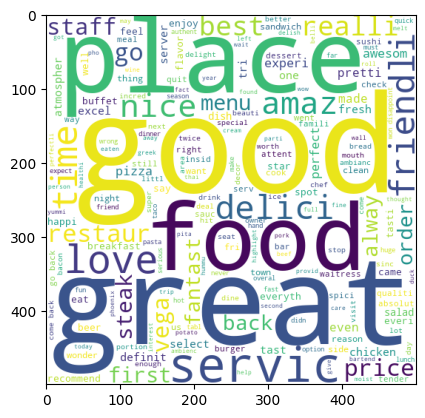

In [61]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=8, background_color='white')
pos = wc.generate(data[data['Liked']==1]['Processed_Text'].str.cat(sep=" "))

plt.imshow(pos)

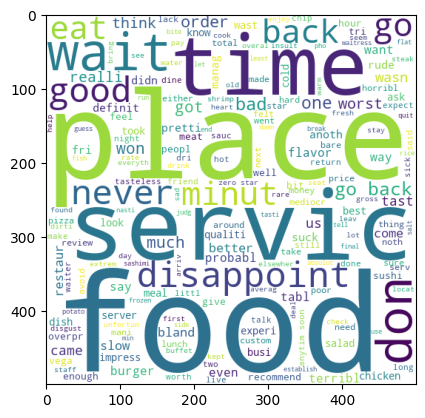

In [62]:
negtive = wc.generate(data[data['Liked']==0]['Processed_Text'].str.cat(sep=" "))
plt.imshow(negtive)

# word embedding

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500) # moset recurring words
X = cv.fit_transform(corpus).toarray()

In [64]:
X.shape

(1000, 1500)

In [65]:
import joblib
joblib.dump(cv,"count_v_res")

['count_v_res']

In [66]:
y =data['Liked']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

import joblib

In [69]:
models = {
    'Nave Bayes' : GaussianNB(),
    'Logistic' : LogisticRegression(),
    'Random Forest Regressor' : RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier()
}

scores = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_test_pred)

    scores.append({f'{model}': score})
    

    joblib.dump(model, f'restaurent_sentimental_analysis_{list(models)[i]}')
    
    print(list(models.keys())[i])
    print("-------------------------------------------------------------------------------")

    print(f'Score : {score} ')
    
    print("===============================================================================")
    

print(scores)

Nave Bayes
-------------------------------------------------------------------------------
Score : 0.68 
Logistic
-------------------------------------------------------------------------------
Score : 0.79 
Random Forest Regressor
-------------------------------------------------------------------------------
Score : 0.79 
Gradient Boost
-------------------------------------------------------------------------------
Score : 0.725 
[{'GaussianNB()': 0.68}, {'LogisticRegression()': 0.79}, {'RandomForestClassifier()': 0.79}, {'GradientBoostingClassifier()': 0.725}]


# prediction woth new data

In [70]:
def preprocess_text(text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

In [83]:
import joblib
vectorizer = joblib.load('./count_v_res')
model = joblib.load('./restaurent_sentimental_analysis_Random Forest Regressor')

In [90]:

# processed_input = preprocess_text("I was disgusted because I was pretty sure that was human hair.")

processed_input = preprocess_text("I could care less... The interior is just beautiful")


In [91]:
processed_input_vectorized = vectorizer.transform([processed_input]).toarray()
prediction = model.predict(processed_input_vectorized)[0]

In [92]:
if prediction == 0:
    print("Negative 😠")
elif prediction == 1:
    print("Positive 😊")
else:
    print("Something went wrong 😕")

Positive 😊
